# About the dataset

The dataset provided contains information about employees in a company, focusing on various attributes related to their employment status, demographics, and reasons for resignation. The key objectives of utilizing this dataset are to analyze the factors contributing to employee turnover and to develop predictive models that can help the company implement effective retention strategies.

# Importing Data

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [221]:
df = pd.read_csv(r'C:\Users\aldiv\Downloads\CV\CV\Portofolio Data Science\Mini Project 1 Improving Employee Retention by Predicting Employee Attrition Using Machine Learning\hr_data.csv')

In [222]:
df['AlasanResign'].unique()

array(['masih_bekerja', 'toxic_culture', 'jam_kerja', 'ganti_karir',
       'tidak_bahagia', 'internal_conflict', 'Product Design (UI & UX)',
       'kejelasan_karir', 'tidak_bisa_remote', 'apresiasi', nan,
       'leadership'], dtype=object)

In [223]:
pd.set_option('display.max_columns', None)
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
43,shamefulIguana0,101682,Lainnya,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Bagus,Jakarta Barat,Indeed,3,5.0,0.0,0.0,4.0,+6281210001xxx,shamefulIguana0780@yahoo.com,Magister,1,0.0,masih_bekerja,1967-06-05,2013-2-18,2020-1-14,-
136,lovesickRhino0,105734,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,LinkedIn,1,3.0,6.0,3.0,2.0,+6287885203xxx,lovesickRhino0235@hotmail.com,Sarjana,1,NaN,tidak_bahagia,1987-06-18,2015-3-30,2020-02-04,2015-04-01
20,peacefulCoati5,100301,Menikah,Wanita,FullTime,Product Manager,Senior_level,Sangat_bagus,Jakarta Utara,LinkedIn,4,5.0,0.0,0.0,15.0,+6283355427xxx,peacefulCoati5154@yahoo.com,Sarjana,1,NaN,masih_bekerja,1977-05-22,2012-01-09,2020-01-07,-
220,soreDunbird3,101434,Belum_menikah,Pria,Outsource,Data Engineer,Freshgraduate_program,Sangat_bagus,Jakarta Utara,LinkedIn,4,4.0,0.0,0.0,11.0,+6285615899xxx,soreDunbird3996@hotmail.com,Magister,1,NaN,NaN,1982-07-22,2011-5-16,2016-3-30,-


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [225]:
df['AlasanResign'].value_counts()

AlasanResign
masih_bekerja               132
jam_kerja                    16
ganti_karir                  14
tidak_bisa_remote            11
kejelasan_karir              11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: count, dtype: int64

In this dataset, there are 287 rows data with 25 columns, including 18 categorical data and 7 numerical data.

In [226]:
# Numerical values description
df.describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000,29.000000
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399,0.517241
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252,0.508548
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000


'EnterpriseID' possible ID columns which is will be drop before modelling. While some other numerical features possibly have an outliers (looking at the mean vs median).

In [227]:
# Categorical values description
df.describe(exclude='number')

,Username,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287,287,287,287,287,287,287,287,287,287,287,287,287,221,287,287,287,287
unique,285,5,2,3,14,3,5,5,9,287,287,3,2,11,284,97,127,53
top,brainyMagpie7,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,+6287722818xxx,puzzledFish5776@hotmail.com,Sarjana,1,masih_bekerja,1987-06-14,2011-01-10,2020-1-14,-
freq,2,132,167,217,109,169,85,72,85,1,1,176,286,132,2,12,17,198


'Username' is a ID columns which will be dropped before modelling. 'NomorHP' and 'Email' will be considered to be dropped because doesn't give information for model. Feature 'Pekerjaan' have many unique values, we can considering to aggregate these unique value before use feature encoding. 'TanggalLahir', 'TanggalHiring,' 'TanggalPenilaianKaryawan,' and 'TanggalResign' are datetime data type so we will change the data type.

In [228]:
from autoviz import data_cleaning_suggestions
data_cleaning_suggestions(df)

    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Username,object,0.000000,99,,,285 rare categories: Too many to list. Group them into a single category or drop the categories.
EnterpriseID,int64,0.000000,100,100282.000000,111703.000000,Possible ID column: drop before modeling step.
StatusPernikahan,object,0.000000,1,,,No issue
JenisKelamin,object,0.000000,0,,,No issue
StatusKepegawaian,object,0.000000,1,,,No issue
Pekerjaan,object,0.000000,4,,,"4 rare categories: ['Machine Learning Engineer', 'Digital Product Manager', 'Product Design (UX Researcher)', 'Software Architect']. Group them into a single category or drop the categories."
JenjangKarir,object,0.000000,1,,,No issue
PerformancePegawai,object,0.000000,1,,,No issue
AsalDaerah,object,0.000000,1,,,No issue
HiringPlatform,object,0.000000,3,,,"2 rare categories: ['Other', 'On-line_Web_application']. Group them into a single category or drop the categories."


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Username,object,0.000000,99,,,285 rare categories: Too many to list. Group them into a single category or drop the categories.
EnterpriseID,int64,0.000000,100,100282.0,111703.0,Possible ID column: drop before modeling step.
StatusPernikahan,object,0.000000,1,,,No issue
JenisKelamin,object,0.000000,0,,,No issue
StatusKepegawaian,object,0.000000,1,,,No issue
Pekerjaan,object,0.000000,4,,,"4 rare categories: ['Machine Learning Engineer', 'Digital Product Manager', 'Product Design (UX Researcher)', 'Software Architect']. Group them into a single category or drop the categories."
JenjangKarir,object,0.000000,1,,,No issue
PerformancePegawai,object,0.000000,1,,,No issue
AsalDaerah,object,0.000000,1,,,No issue
HiringPlatform,object,0.000000,3,,,"2 rare categories: ['Other', 'On-line_Web_application']. Group them into a single category or drop the categories."


Using data_cleaning_suggestions help us to identify missing value, number of unique values, minimum and maximum values, outliers, and some recommendation. But, this function is not 100% true so we need to analyze again the data

SkorSurveyEngagement, SkorKepuasanPegawai, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir, and JumlahKetidakhadiran are considered has outliers but we will keep these feature for further analysis in **handling outliers stage**

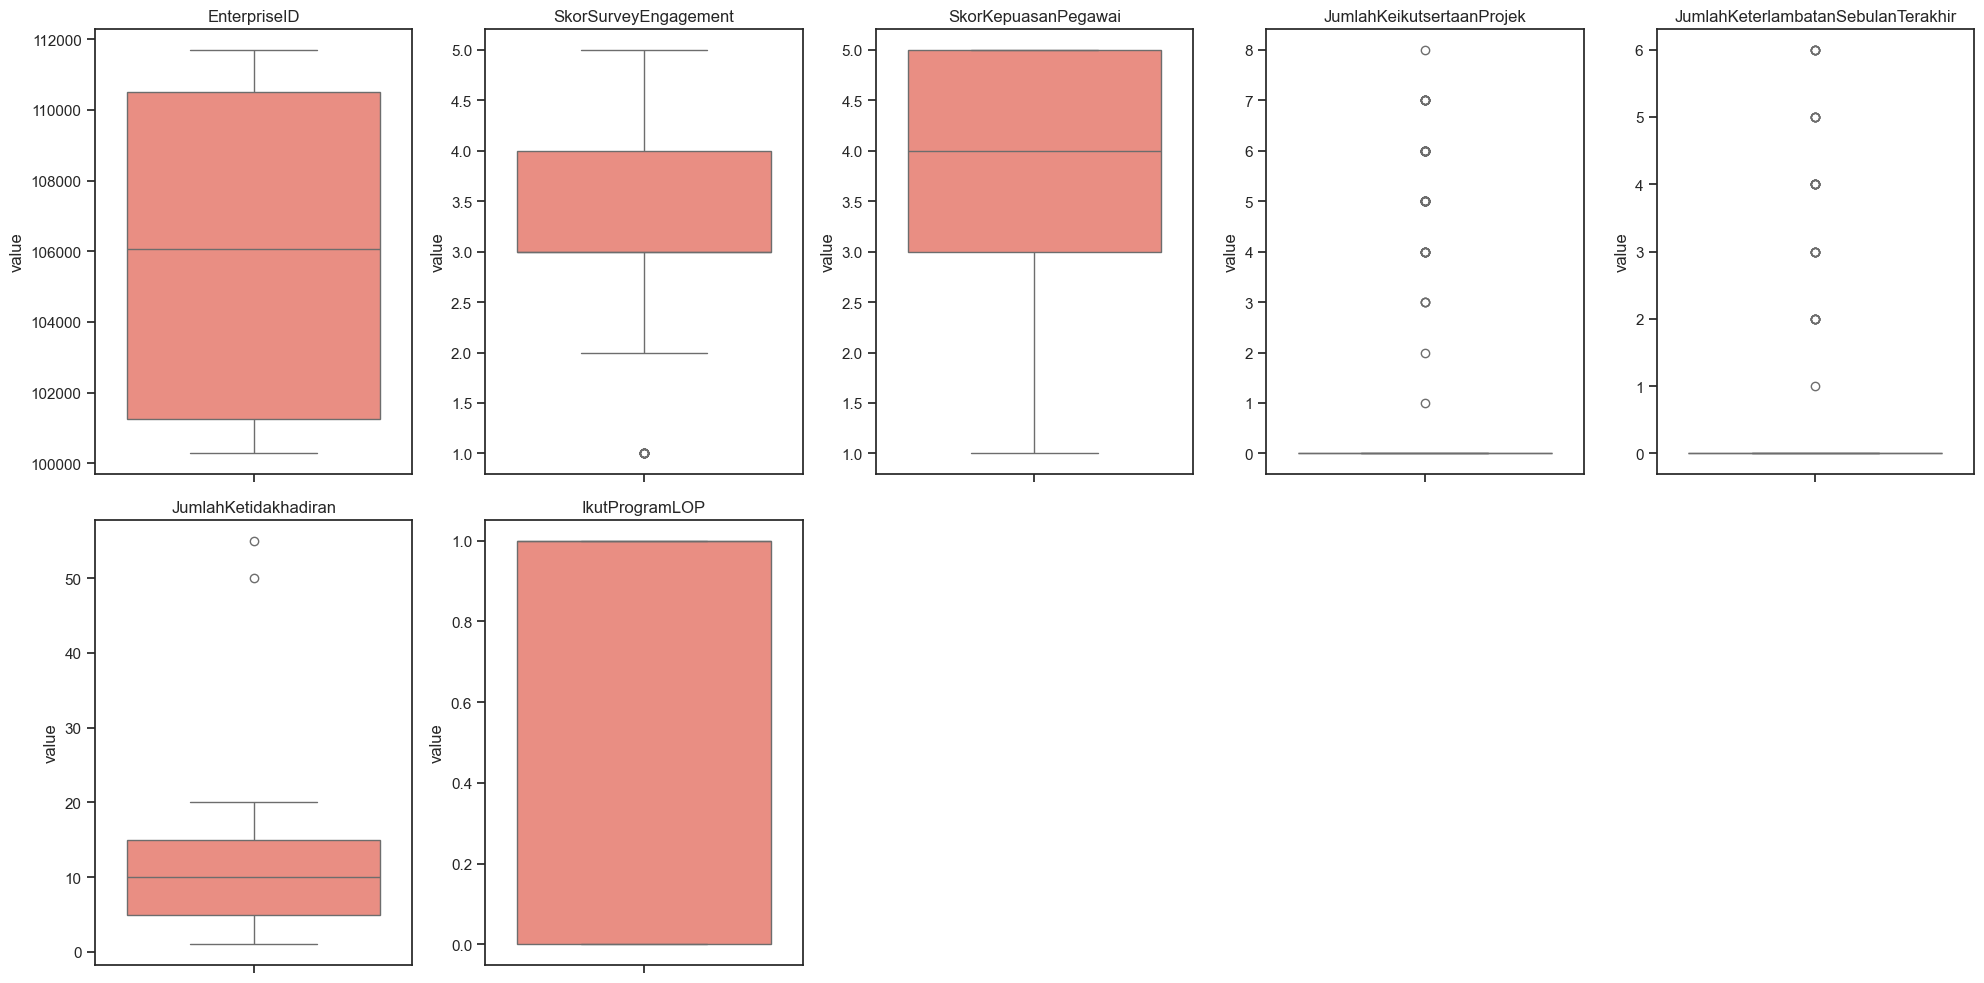

In [229]:
numerical_cols = df.select_dtypes(['float64', 'int64']).columns

num_cols = 5
num_rows = (len(numerical_cols) // num_cols) + (len(numerical_cols) % num_cols > 0)

plt.figure(figsize=(20, num_rows * 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[col], color='salmon')
    plt.title(col)
    plt.ylabel('value')
    plt.tight_layout() 

plt.show()

# Drop ID columns feature

In [230]:
df_feat = df.copy()
df_feat = df_feat.drop(['Username', 'EnterpriseID', 'NomorHP', 'Email'], axis=1)

# Change Data Types 

In [231]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   JenisKelamin                        287 non-null    object 
 2   StatusKepegawaian                   287 non-null    object 
 3   Pekerjaan                           287 non-null    object 
 4   JenjangKarir                        287 non-null    object 
 5   PerformancePegawai                  287 non-null    object 
 6   AsalDaerah                          287 non-null    object 
 7   HiringPlatform                      287 non-null    object 
 8   SkorSurveyEngagement                287 non-null    int64  
 9   SkorKepuasanPegawai                 282 non-null    float64
 10  JumlahKeikutsertaanProjek           284 non-null    float64
 11  JumlahKeterlambatanSebulanTerakhir  286 non-n

In [232]:
def change_to_datetime(df):
    df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'], errors='coerce')
    df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'], errors='coerce')
    df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'], errors='coerce')
    df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')
    return df

df_dt = df_feat.copy()
df_dt = change_to_datetime(df_dt)

# Check Correlation

## Numerical Features

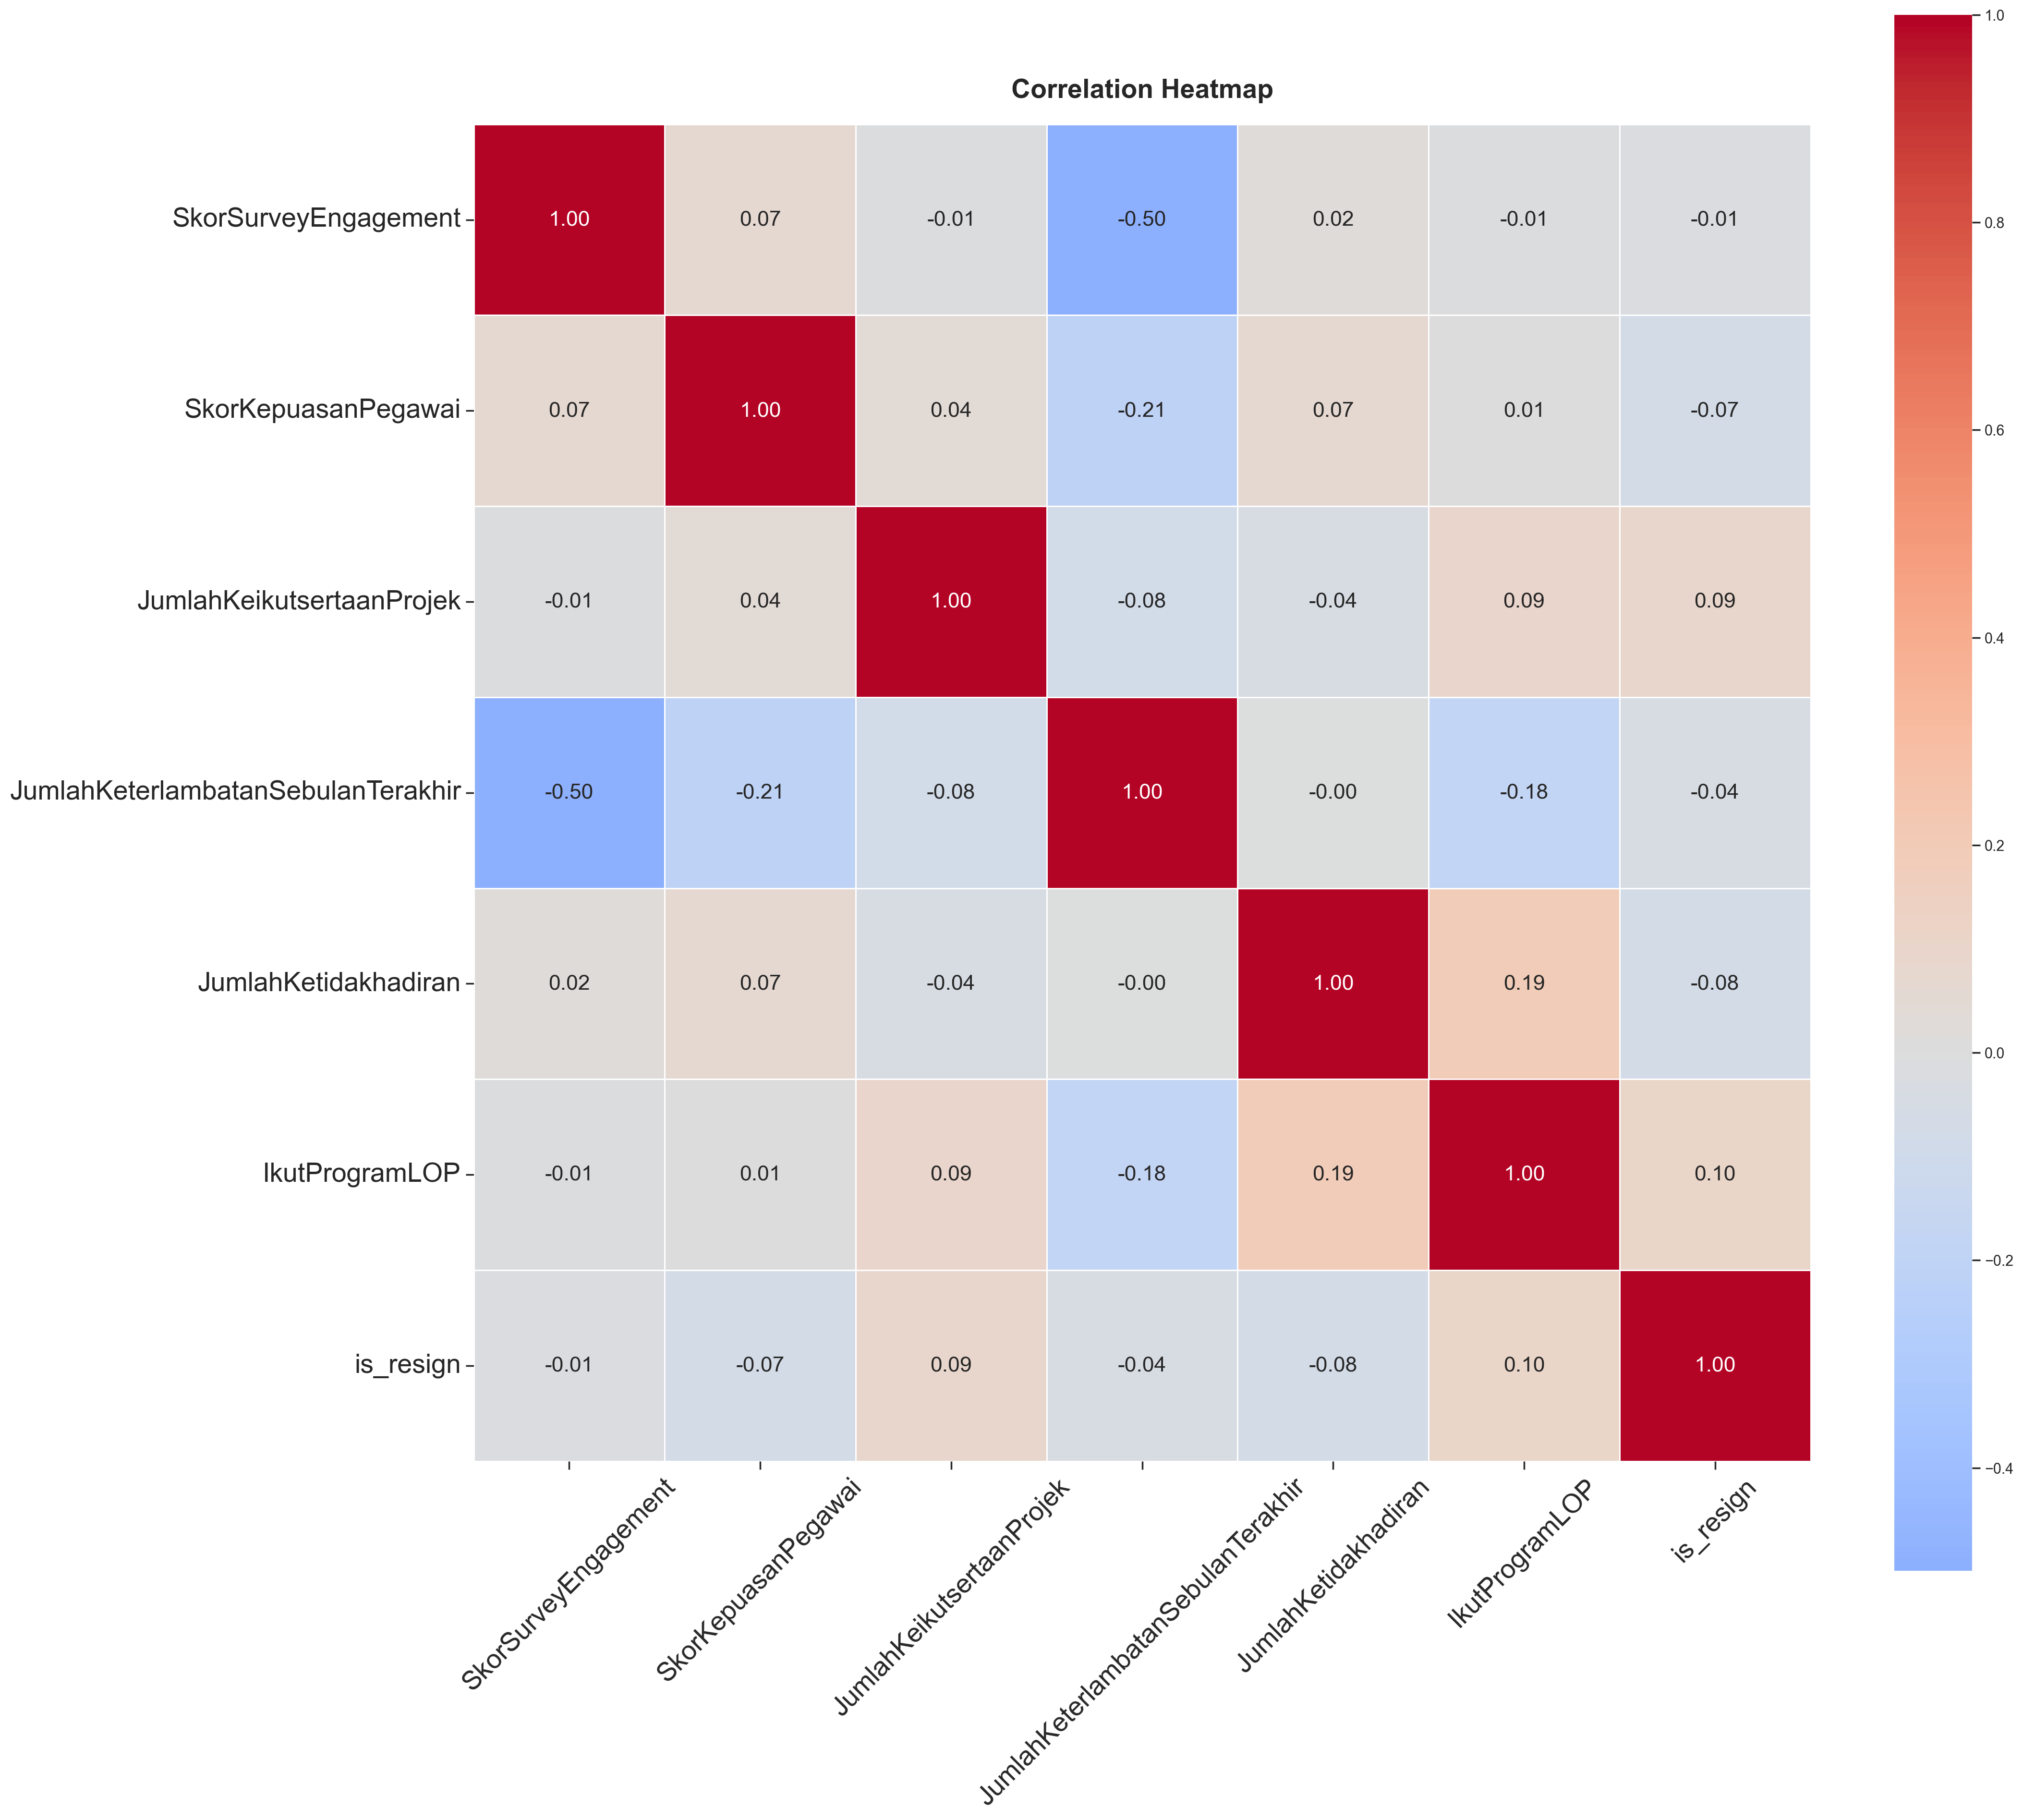


Pasangan fitur dengan korelasi tinggi (>0.7):


In [281]:
%matplotlib inline
df_corr = df_dt.copy()
df_corr['is_resign'] = df_corr['AlasanResign'].apply(lambda x: 0 if x == 'masih_bekerja' else 1)
df_corr['is_resign'] = df_corr['is_resign'].astype('int64')
numerical_cols = df_corr.select_dtypes(['float64', 'int64']).columns
plt.figure(figsize=(20, 20), dpi=200)
correlation_matrix = df_corr[numerical_cols].corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True, linewidths=0.5, annot_kws={'size': 16},
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Correlation Heatmap', pad = 20, fontweight='bold', fontsize = 20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.show()
plt.close()

threshold = 0.7
high_corr_features = np.where(np.abs(correlation_matrix) > threshold)
high_corr_features = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x,y]) 
                      for x, y in zip(*high_corr_features) if x != y and x < y]

print("\nPasangan fitur dengan korelasi tinggi (>0.7):")
for feat1, feat2, corr in high_corr_features:
    print(f"{feat1} - {feat2}: {corr:.2f}")

**Insights from the Correlation Heatmap**<br>
The correlation heatmap provides a visual representation of the relationships between various employee metrics. Here are the key insights derived from the analysis:

**Strong Negative Correlation:**<br>
- There is a significant negative correlation of -0.50 between Survey Engagement Score and JumlahKeterlambatanSebulanTerakhir. This suggests that as employee engagement scores increase, number of employee's late in last month is low which is meaning they are a good employer.<br>

**Moderate Negative Correlation:**<br>
- JumlahKeterlambatanSebulanTerakhir also shows a moderate negative correlation with Job Satisfaction Score (-0.21) and IkutProgramLOP (-0.18). This could imply employee with a good job satisfaction score and not attend LOP program likely low late on time.<br>

**Positive Correlation:**<br>
- The Number absteins exhibits a positive correlation of 0.19 with the attendance to LOP program.<br>

**Low Correlations:**<br>
- Most other correlations are relatively weak (close to zero), indicating little to no relationship between those particular metrics. For example, Job Satisfaction Score has low correlations with several other variables, suggesting that factors influencing job satisfaction may be more complex or multifaceted.

**Implications for HR Strategies:**
- The negative correlation between engagement and project completion suggests that the company may need to assess workload distribution and employee engagement strategies. If employees are overburdened, it may lead to burnout and increased turnover.
Encouraging participation in learning and development programs could enhance employee satisfaction and engagement, which are critical for retention.

**Conclusion** <br>
Overall, the heatmap highlights important relationships among employee metrics that can inform HR strategies. Addressing the factors leading to lower engagement and job satisfaction while promoting development opportunities may help improve overall employee retention and performance within the organization.

# handling Missing Values

In [234]:
# List of common missing value strings
missing_values_set = [
    'NA', 'N/A', 'null', 'NaN','nan', 'XNA', 'None', 'empty', 'undefined', 'unknown', 'Unknown',
    '--', 'not available', '',' ','  ','   ', 'missing', 'unavailable', 'not applicable',
    'not found', 'no data', 'no value', 'n/a', 'none', 'null value', 'unknown value', 'blank', 'invalid', 'error',
    'unassigned', 'uninitialized', 'void', 'undisclosed', 'unreported', 'empty string',
    'na', 'not recorded', 'unanswered', 'not specified', 'unobserved', 'unpopulated',
    'none of the above', 'does not apply', 'ignored', 'unspecified', 'unfilled', 'inapplicable',
    'unavailable value', 'not entered', 'missing value', 'data not available', 'data missing',
    'not inputted', 'not given', 'unrecorded', 'unfurnished', 'undocumented', 'not listed',
    'unsupplied', 'empty field', 'unfilled field', 'unanswered question', 'no response',
    'not provided', 'not reported', 'unanswered', 'unacknowledged', 'no information',
    'no response recorded', 'no submission', 'no entry', 'not logged', 'unverified',
    'unobserved value', 'data absent', 'absence', 'unfilled cell', 'undefined data',
    'does not exist', 'not found', 'missing data', 'no answer', 'unavailable information',
    'no input', 'data error', 'unseen', 'unviewed', 'not selected', 'irrelevant',
    'skipped', 'no response given', 'no feedback', 'failed', 'discarded', 'no record',
    'unfetched', 'not completed', 'not finished', 'not updated', 'forgotten', 'rejected',
    'unsupplied data', 'data void', 'undetermined', 'not checked', 'not applicable here',
    'unattended', 'data missing', 'nonexistent', 'unsubscribed', 'denied', 'unaccepted',
    'unwitnessed', 'discarded entry', 'rejected data', 'unapplicable', 'non-populated',
    'unapplicable field', 'lost', 'absent data', 'no match', 'no result'
]

# Optimized function to replace missing-like values with NaN
def replace_missing_with_null(df, missing_values_set):
    # Select object type columns
    df_object_columns = df.select_dtypes(include=['object'])

    # Replace missing-like values with NaN
    for col in df_object_columns.columns:
        # Vectorized replacement of missing-like values with NaN
        df[col] = df[col].apply(lambda x: np.nan if str(x).strip() in missing_values_set else x)

    return df

In [235]:
df_clean = df_dt.copy()
df_clean = replace_missing_with_null(df_clean, missing_values_set)

In [236]:
# Function untuk mengecek persentase null value

def check_null_percentage(df):
    # Hitung total rows
    total_rows = len(df)

    # Hitung null values dan persentasenya
    null_counts = df.isnull().sum()
    null_percentage = (null_counts / total_rows * 100).round(2)

    # Buat dataframe hasil
    null_df = pd.DataFrame({
        'Total_Null': null_counts,
        'Null_Percentage': null_percentage
    })

    # Sorting berdasarkan persentase null terbesar
    null_df = null_df.sort_values('Null_Percentage', ascending=False)

    # Filter hanya kolom yang memiliki null values
    null_df = null_df[null_df['Total_Null'] > 0]

    return null_df

# # Check null value (data) after handling null value
null_analysis = check_null_percentage(df_clean)
print("Total rows in dataset:", len(df_clean))
print("\nNull Value Analysis:")
print(null_analysis)

Total rows in dataset: 287

Null Value Analysis:
                                    Total_Null  Null_Percentage
IkutProgramLOP                          258          89.90     
TanggalResign                           198          68.99     
AlasanResign                             66          23.00     
JumlahKetidakhadiran                      6           2.09     
SkorKepuasanPegawai                       5           1.74     
JumlahKeikutsertaanProjek                 3           1.05     
JumlahKeterlambatanSebulanTerakhir        1           0.35     


- We will drop IkutProgramLOP feature because it is has high null percentage which is not giving any information for machine learning.
- As for TanggalResign, the feature has 69% missing value. The missing value with more than 60% likely doesn't have much information, but in this case, the missing value indicate that the employee still working (not yet resign). So, we will impute them with 2100-01-01.
- As for the rest, since the data is too small, we will fill the missing value with median and mode instead drop the missing values.

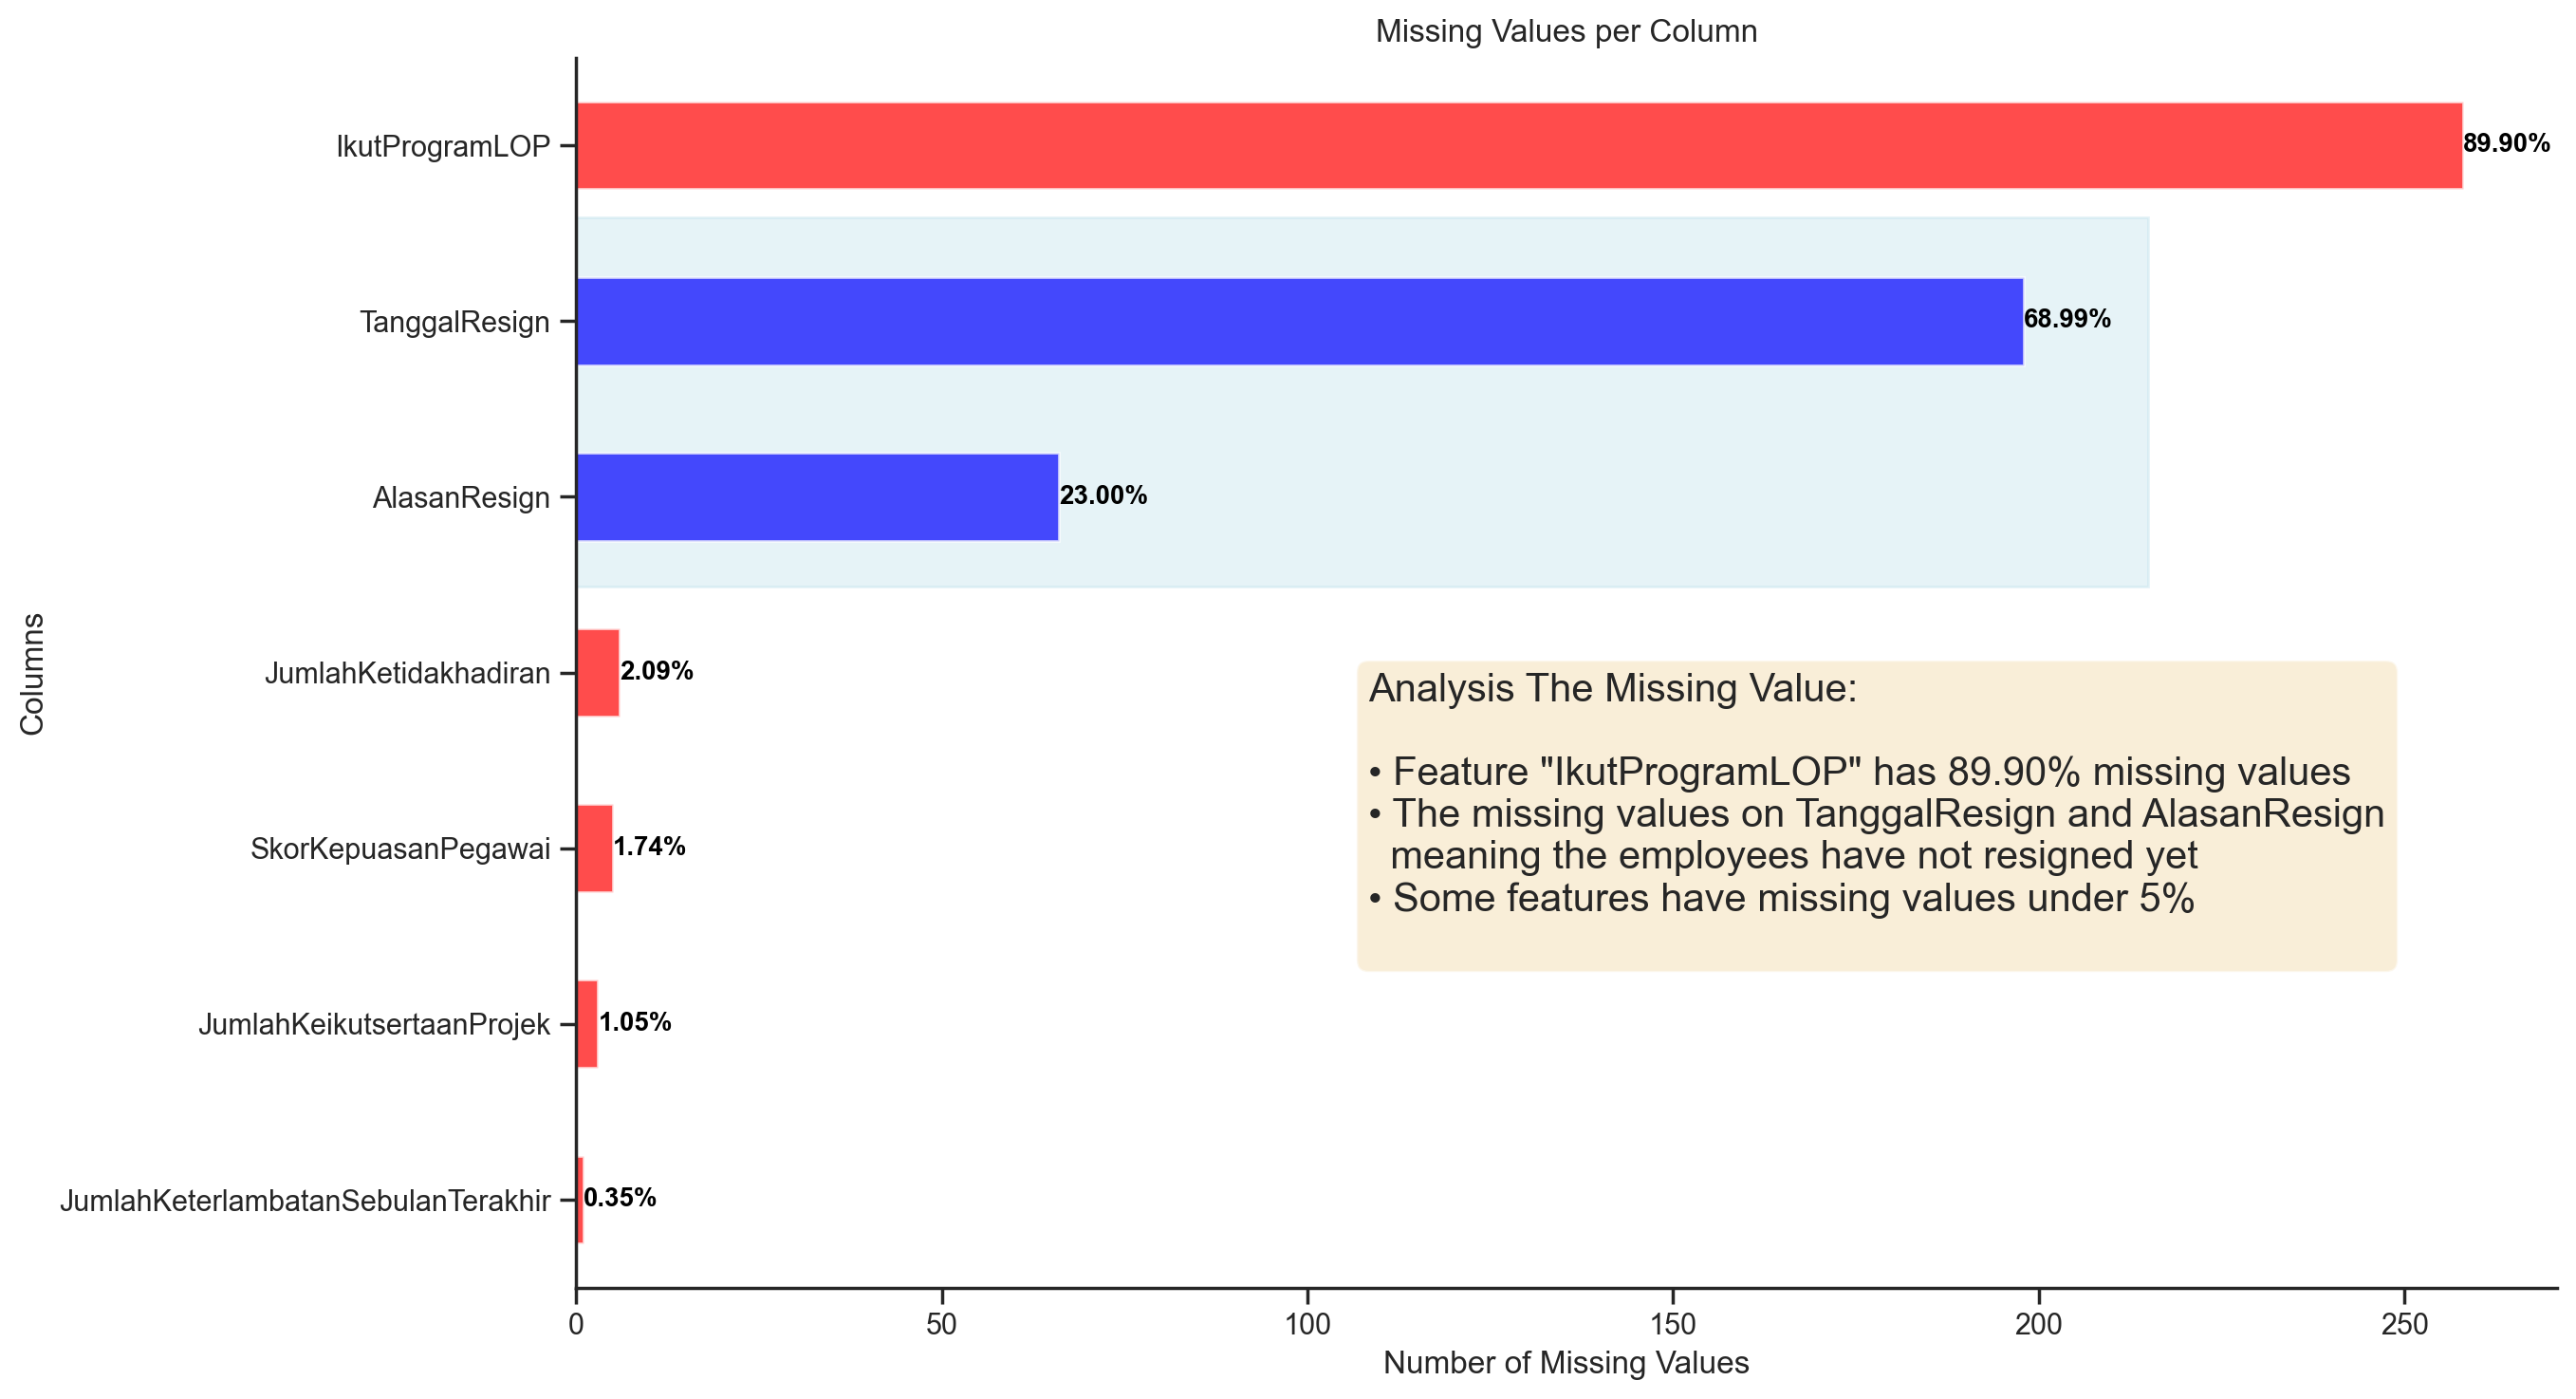

In [237]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line to load your data

# Calculate the number of missing values per column
missing_values_count = df_clean.isnull().sum()

# Calculate the percentage of missing values per column
missing_values_percentage = (missing_values_count / len(df)) * 100

# Create a DataFrame to hold both count and percentage
missing_values_df = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Percentage': missing_values_percentage
})

# Sort the DataFrame by the number of missing values in descending order
sorted_missing_values_df = missing_values_df.sort_values(by='Missing Count', ascending=True)

# Filter out columns with no missing values
sorted_missing_values_df = sorted_missing_values_df[sorted_missing_values_df['Missing Count'] > 0]

# Set the size of the plot
plt.figure(figsize=(12, 8), dpi=200)

# Add highlighted areas
plt.axvspan(xmin=0, xmax=215, ymin=0.57, ymax=0.87, color='lightblue', alpha=0.3)

# Highlight specific bars
colors = ['red' if column not in ['TanggalResign', 'AlasanResign'] else 'blue' for column in sorted_missing_values_df.index]

# Create a horizontal bar plot for missing count
ax = sorted_missing_values_df['Missing Count'].plot(kind='barh', color=colors, alpha=0.7, label='Missing Count')

# Add the missing percentage as text on the bars
for i, (count, percentage) in enumerate(zip(sorted_missing_values_df['Missing Count'], sorted_missing_values_df['Missing Percentage'])):
    ax.text(count, i, f'{percentage:.2f}%', va='center', ha='left', fontsize=10, color='black', fontweight='bold')

# Adding Text
desc_text = (
    'Analysis The Missing Value:\n\n'
    f'• Feature "IkutProgramLOP" has 89.90% missing values\n'
    f'• The missing values on TanggalResign and AlasanResign\n  meaning the employees have not resigned yet\n'
    f'• Some features have missing values under 5%\n'
)

# Adding the Box Description
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.4, 0.5, desc_text,
         transform=plt.gca().transAxes,
         fontsize=15,
         verticalalignment='top',
         bbox=props)

# Add a title and labels
plt.title('Missing Values per Column')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')

# Display the plot
sns.despine()
plt.show()


In [238]:
# Display the first few rows where 'AlasanResign' has missing values
missing_values_df = df[df['AlasanResign'].isnull()]
missing_values_df.sample(5)


,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
272,adoringMacaw3,110492,Bercerai,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Barat,Indeed,2,4.0,0.0,0.0,11.0,+6285627455xxx,adoringMacaw3272@yahoo.com,Sarjana,1,NaN,NaN,1979-02-12,2014-05-12,2020-2-19,-
273,amusedIcecream0,111104,Menikah,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Bagus,Jakarta Pusat,Google_Search,3,3.0,0.0,0.0,10.0,+6285622739xxx,amusedIcecream0506@outlook.com,Sarjana,1,NaN,NaN,1982-09-02,2012-5-14,2020-2-22,-
280,anxiousTeal2,111378,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Mid_level,Bagus,Jakarta Timur,Employee_Referral,3,5.0,7.0,0.0,16.0,+6289567915xxx,anxiousTeal2015@gmail.com,Sarjana,1,NaN,NaN,1984-09-16,2014-11-10,2020-01-04,-
237,similarCaviar3,105951,Lainnya,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Selatan,Indeed,3,3.0,0.0,0.0,6.0,+6283269904xxx,similarCaviar3516@icloud.com,Sarjana,1,NaN,NaN,1992-05-07,2015-06-05,2020-2-14,-
200,jubilantWildfowl6,105889,Belum_menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Sangat_kurang,Jakarta Barat,Google_Search,3,4.0,0.0,0.0,13.0,+6285783035xxx,jubilantWildfowl6521@yahoo.com,Sarjana,1,NaN,NaN,1977-03-23,2011-11-28,2020-2-22,-


In [239]:
missing_values_df = df[df['SkorKepuasanPegawai'].isnull()]
missing_values_df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
55,importedApricots7,105820,Menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Barat,Indeed,3,NaN,NaN,0.0,10.0,+6289594763xxx,importedApricots7729@hotmail.com,Sarjana,1,0.0,masih_bekerja,1971-10-23,2015-2-16,2016-1-20,-
8,lyingMussel8,110533,Bercerai,Pria,FullTime,Software Engineer (Android),Senior_level,Sangat_kurang,Jakarta Selatan,Employee_Referral,3,NaN,0.0,0.0,5.0,+6281276485xxx,lyingMussel8944@proton.com,Magister,1,NaN,masih_bekerja,1980-08-26,2016-07-06,2020-2-28,-
25,needySyrup4,101226,Bercerai,Pria,FullTime,Product Manager,Freshgraduate_program,Biasa,Jakarta Pusat,Diversity_Job_Fair,2,NaN,6.0,4.0,13.0,+6283112696xxx,needySyrup4506@hotmail.com,Magister,1,NaN,ganti_karir,1986-10-05,2012-2-15,2020-2-22,2018-2-19
122,puzzledBurritos7,111373,Belum_menikah,Wanita,Outsource,Software Engineer (Android),Mid_level,Kurang,Jakarta Timur,LinkedIn,3,NaN,NaN,0.0,14.0,+6281254157xxx,puzzledBurritos7565@icloud.com,Sarjana,1,NaN,masih_bekerja,1979-03-10,2012-04-02,2020-1-14,-
166,resolvedCod5,110380,Belum_menikah,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Pusat,Google_Search,4,NaN,0.0,0.0,13.0,+6287879882xxx,resolvedCod5392@outlook.com,Sarjana,1,NaN,masih_bekerja,1970-12-22,2012-04-02,2020-1-14,-


In [240]:
def handling_na(data):
    data = data.copy()
    # Drop columns with more than 60% missing values
    data = data.drop(columns=['IkutProgramLOP'], axis=1)
    # Fill TanggalResign with 9999-12-31
    data['TanggalResign'] = data['TanggalResign'].fillna(pd.Timestamp('2100-01-01')) # To indicate that the employee hasn't resigned
    # Fill missing values with mode
    data['AlasanResign'] = data['AlasanResign'].fillna(data['AlasanResign'].mode()[0])
    # Fill missing values with median
    fill_with_median = ['JumlahKetidakhadiran', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir']
    data[fill_with_median] = data[fill_with_median].fillna(data[fill_with_median].median())
    return data

df_clean = handling_na(df_clean)


- **IkutProgramLOP**: Dropping the feature because it has too many missing value<br>

- **TanggalResign**: Filling the missing value to 2100-01-01 because we assuming the missing value meaning the employee has not resign yet (still working).<br>

- **AlasanResign**: Filling with mode because unique value 'masih_bekerja' is the mode and after we checked it, the missing values meaning the employees are still working (has not resign). We can looking at the TanggalResign is nan.<br>

- **JumlahKetidakhadiran**: We fill the missing value with median because we do not know whether this people has 0 abstein or not. Since the missing value under 5%, changing it to median will not change the whole data where might be misleading.<br>

- **SkorKepuasanPegawai**: We fill it with median because we assume these person has not fill the SkorKepuasanPegawai data. If we assume to 0, it might be misleading. These employee might be not really want to score as 0. Since the missing value under 5%, if we change it to median, significantly will not change the entire data.<br>

- **JumlahKeikutsertaanProjek**: Same with the previous features, we fill it with median because the missing value under 5%.<br>

- **JumlahKeterlambatanSebulanTerakhir**: Same with the previous features, we fill it with median because the missing value under 5%.<br>

# Handling Duplicated Data

In [241]:
print(f'Number of duplicated data: {df_clean.duplicated().sum()}')

Number of duplicated data: 0


In [242]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    287 non-null    object        
 1   JenisKelamin                        287 non-null    object        
 2   StatusKepegawaian                   287 non-null    object        
 3   Pekerjaan                           287 non-null    object        
 4   JenjangKarir                        287 non-null    object        
 5   PerformancePegawai                  287 non-null    object        
 6   AsalDaerah                          287 non-null    object        
 7   HiringPlatform                      287 non-null    object        
 8   SkorSurveyEngagement                287 non-null    int64         
 9   SkorKepuasanPegawai                 287 non-null    float64       
 10  JumlahKeikutsertaanProjek 

# Handling Outliers

In [243]:
df_transformed = df_clean.copy()

## SkorSurveyEngagement

In [244]:
df_transformed['SkorSurveyEngagement'].describe()

count    287.000000
mean       3.101045
std        0.836388
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: SkorSurveyEngagement, dtype: float64

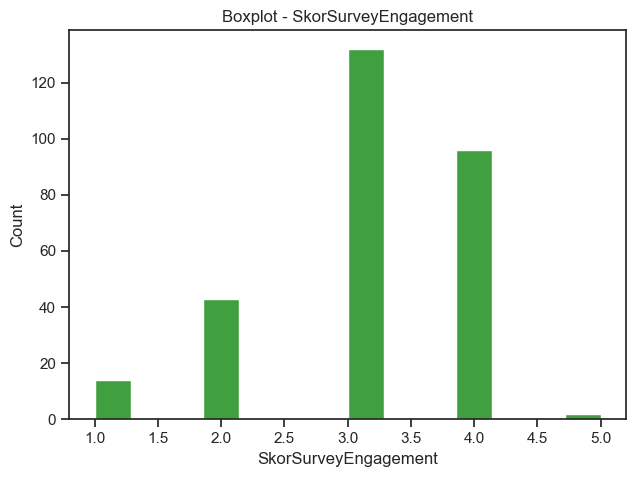

In [245]:
col = 'SkorSurveyEngagement'
sns.histplot((df_transformed[col]),color='green')
plt.title(f'Boxplot - {col}')
plt.show()

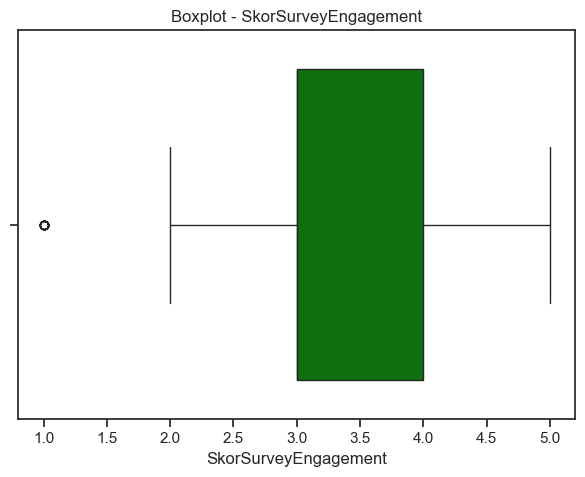

In [246]:
col = 'SkorSurveyEngagement'
sns.boxplot((df_transformed[col]),color='green', orient='h')
plt.title(f'Boxplot - {col}')
plt.show()

We considering not to drop the outliers because it seem the outliers is not anomaly. We can see that the outlier with value 1 in scale from 1 - 5, meaning the values "1" is not anomaly.

## SkorKepuasanPegawai

In [247]:
df_transformed['SkorKepuasanPegawai'].describe()

count    287.000000
mean       3.905923
std        0.905423
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: SkorKepuasanPegawai, dtype: float64

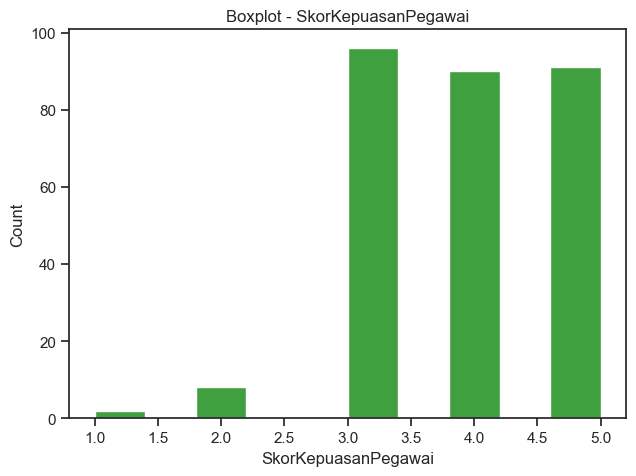

In [248]:
col = 'SkorKepuasanPegawai'
sns.histplot((df_transformed[col]),color='green')
plt.title(f'Boxplot - {col}')
plt.show()

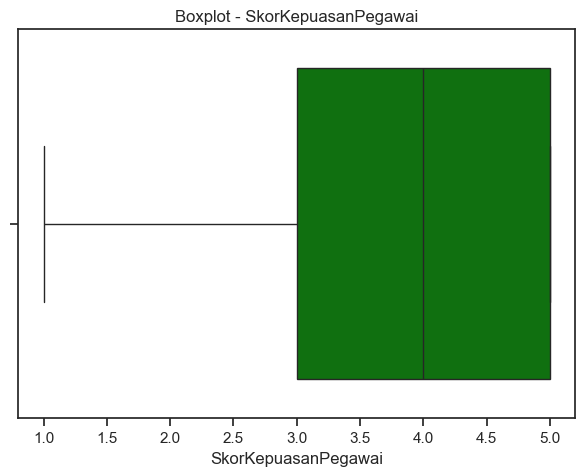

In [249]:
col = 'SkorKepuasanPegawai'
sns.boxplot((df_transformed[col]),color='green', orient='h')
plt.title(f'Boxplot - {col}')
plt.show()

No outliers found in this feature

## JumlahKeikutsertaanProjek

In [250]:
df_transformed['JumlahKeikutsertaanProjek'].describe()

count    287.000000
mean       1.167247
std        2.285537
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        8.000000
Name: JumlahKeikutsertaanProjek, dtype: float64

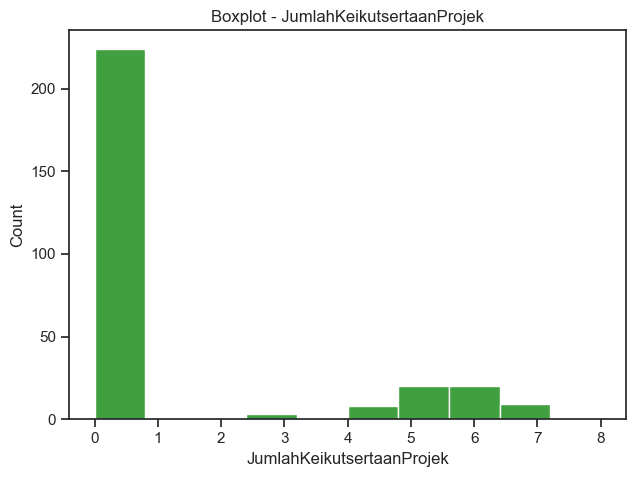

In [251]:
col = 'JumlahKeikutsertaanProjek'
sns.histplot((df_transformed[col]),color='green')
plt.title(f'Boxplot - {col}')
plt.show()

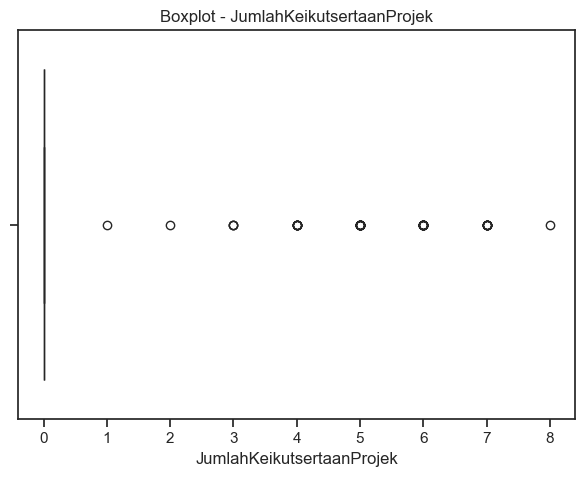

In [252]:
col = 'JumlahKeikutsertaanProjek'
sns.boxplot((df_transformed[col]),color='green', orient='h')
plt.title(f'Boxplot - {col}')
plt.show()

Most of data in feature 'JumlahKeikutsertaanProjek' are 0, meaning many employee doesn't participate in project. But, some people has and there are people who participate in project 8 times and we considering this is not anomaly. So, we will not to drop this outliers.    

## JumlahKeterlambatanSebulanTerakhir

In [253]:
df_transformed['JumlahKeterlambatanSebulanTerakhir'].describe()

count    287.000000
mean       0.411150
std        1.273018
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: JumlahKeterlambatanSebulanTerakhir, dtype: float64

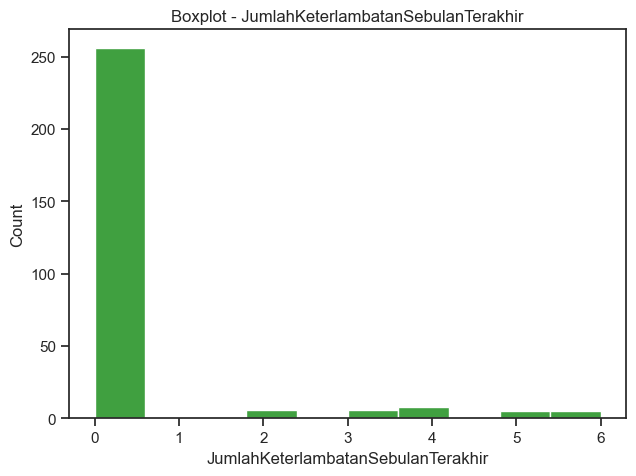

In [254]:
col = 'JumlahKeterlambatanSebulanTerakhir'
sns.histplot((df_transformed[col]),color='green')
plt.title(f'Boxplot - {col}')
plt.show()

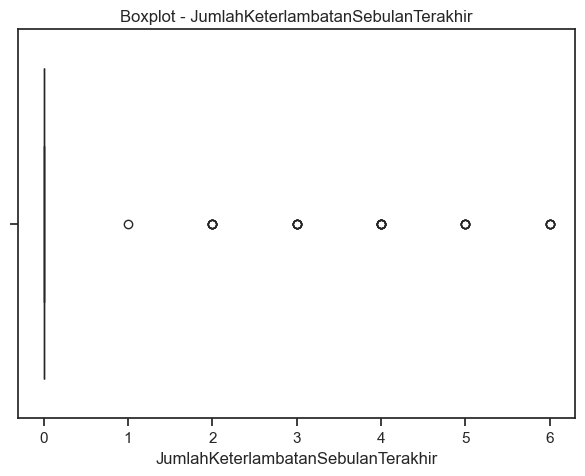

In [255]:
col = 'JumlahKeterlambatanSebulanTerakhir'
sns.boxplot((df_transformed[col]),color='green', orient='h')
plt.title(f'Boxplot - {col}')
plt.show()

The values in JumlahKeterlambatanSebulanTerakhir is dominated with 0 while some data shows between 2 to 6 times. We considering this is not anomaly because the 0 value indicate these people is a good employer while people with work delay especially 6 times can be considered as bad employer.

## JumlahKetidakhadiran

In [256]:
df_transformed['JumlahKetidakhadiran'].describe()

count    287.000000
mean      10.439024
std        6.829769
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       55.000000
Name: JumlahKetidakhadiran, dtype: float64

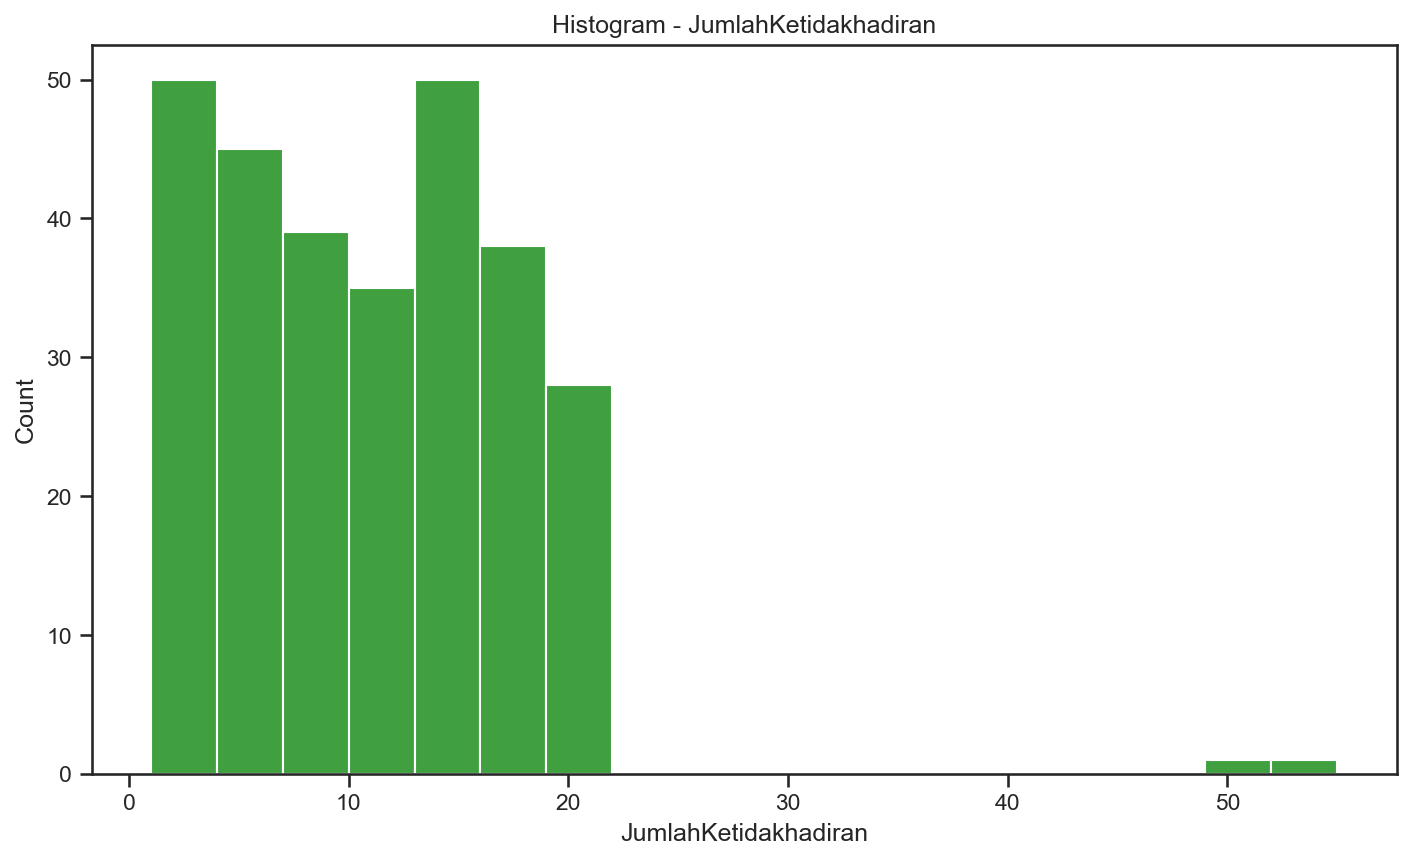

In [264]:
col = 'JumlahKetidakhadiran'
plt.figure(figsize=(10, 6), dpi=150)
sns.histplot((df_transformed[col]),color='green')
plt.title(f'Histogram - {col}')
plt.show()

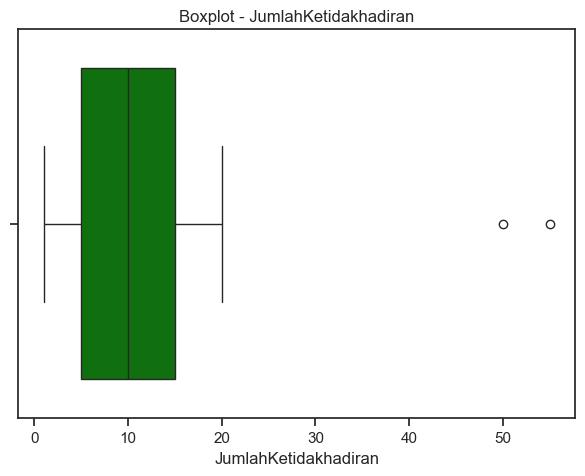

In [97]:
col = 'JumlahKetidakhadiran'
sns.boxplot((df_transformed[col]),color='green', orient='h')
plt.title(f'Boxplot - {col}')
plt.show()

In [98]:
df_transformed[df_transformed['JumlahKetidakhadiran'] >= 50].sort_values('JumlahKetidakhadiran', ascending=False)

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
115,Lainnya,Wanita,FullTime,Software Engineer (Front End),Mid_level,Biasa,Jakarta Pusat,Google_Search,4,5.0,0.0,0.0,55.0,Sarjana,1,masih_bekerja,1973-01-12,2011-11-28,2020-02-11,2100-01-01
12,Menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,LinkedIn,4,3.0,0.0,0.0,50.0,Magister,1,masih_bekerja,1988-08-10,2013-11-11,2020-01-08,2100-01-01


The outliers shows there employee with 50 - 55 number of absences. After we look through their data, we saw that these people have worked aroud 7 - 9 years and it is possible that these outliers is the calculation after 7 - 9 work years. So, we will not to drop the outliers.

# Feature Encoding

In [99]:
df_encode = df_transformed.copy()
df_encode.select_dtypes('object').columns.to_list()

['StatusPernikahan',
 'JenisKelamin',
 'StatusKepegawaian',
 'Pekerjaan',
 'JenjangKarir',
 'PerformancePegawai',
 'AsalDaerah',
 'HiringPlatform',
 'TingkatPendidikan',
 'PernahBekerja',
 'AlasanResign']

## StatusPernikahan

In [100]:
df_encode['StatusPernikahan'].value_counts()

StatusPernikahan
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: count, dtype: int64

There is null value " - " and we will aggregate to "Lainnya". We will use one hot encoding to transform categorical into numerical feature with avoiding ordinal relationships without label encoding. For example, if we name Belum_menikah as 0 and Menikah as 1, the model might incorrectly infer that Menikah (1) is better than Belum_menikah (0)

In [101]:
def feat_encode(data):
    data = data.copy()
    # Label encoding
    data['StatusPernikahan'] = data['StatusPernikahan'].map({'Belum_menikah': 'Belum_menikah', 
                                                             'Menikah': 'Menikah',
                                                             'Bercerai': 'Bercerai',
                                                             'Lainnya': 'Lainnya',
                                                             '-': 'Lainnya'})
    # One-hot encoding
    data = pd.get_dummies(data, columns=['StatusPernikahan'], prefix='StatusPernikahan')
    return data


df_encode = feat_encode(df_encode)
df_encode.columns

Index(['JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir',
       'PerformancePegawai', 'AsalDaerah', 'HiringPlatform',
       'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'TingkatPendidikan', 'PernahBekerja',
       'AlasanResign', 'TanggalLahir', 'TanggalHiring',
       'TanggalPenilaianKaryawan', 'TanggalResign',
       'StatusPernikahan_Belum_menikah', 'StatusPernikahan_Bercerai',
       'StatusPernikahan_Lainnya', 'StatusPernikahan_Menikah'],
      dtype='object')

## JenisKelamin

In [102]:
df_encode['JenisKelamin'].value_counts()

JenisKelamin
Wanita    167
Pria      120
Name: count, dtype: int64

We will use label encoding since the value is binary. We use label encoding because its simplicity and efficiency, reducing complexity if using one hot encoding.

In [103]:
def feat_encode(data):
    data = data.copy()
    # Label encoding
    data['JenisKelamin'] = data['JenisKelamin'].map({'Pria': 1, 'Wanita': 0})
    return data

df_encode = feat_encode(df_encode)

## StatusKepegawaian

In [104]:
df_encode['StatusKepegawaian'].value_counts()   

StatusKepegawaian
FullTime      217
Outsource      66
Internship      4
Name: count, dtype: int64

We will use One Hot Encoding because this values is not ordinal and to avoiding ordinal relationship

In [105]:
def feat_encode(data):
    data = data.copy()
    # Label encoding
    data = pd.get_dummies(data, columns=['StatusKepegawaian'], prefix='StatusKepegawaian')
    return data

df_encode = feat_encode(df_encode)
df_encode.columns  

Index(['JenisKelamin', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai',
       'AsalDaerah', 'HiringPlatform', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran',
       'TingkatPendidikan', 'PernahBekerja', 'AlasanResign', 'TanggalLahir',
       'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign',
       'StatusPernikahan_Belum_menikah', 'StatusPernikahan_Bercerai',
       'StatusPernikahan_Lainnya', 'StatusPernikahan_Menikah',
       'StatusKepegawaian_FullTime', 'StatusKepegawaian_Internship',
       'StatusKepegawaian_Outsource'],
      dtype='object')

## Pekerjaan

In [106]:
df_encode['Pekerjaan'].value_counts()

Pekerjaan
Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       16
Data Engineer                      10
Scrum Master                        3
DevOps Engineer                     3
Software Engineer (iOS)             3
Machine Learning Engineer           2
Digital Product Manager             2
Product Design (UX Researcher)      1
Software Architect                  1
Name: count, dtype: int64

We want to check which occupation is often resign

In [107]:
df_encode['AlasanResign'].value_counts()

AlasanResign
masih_bekerja               198
jam_kerja                    16
ganti_karir                  14
tidak_bisa_remote            11
kejelasan_karir              11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: count, dtype: int64

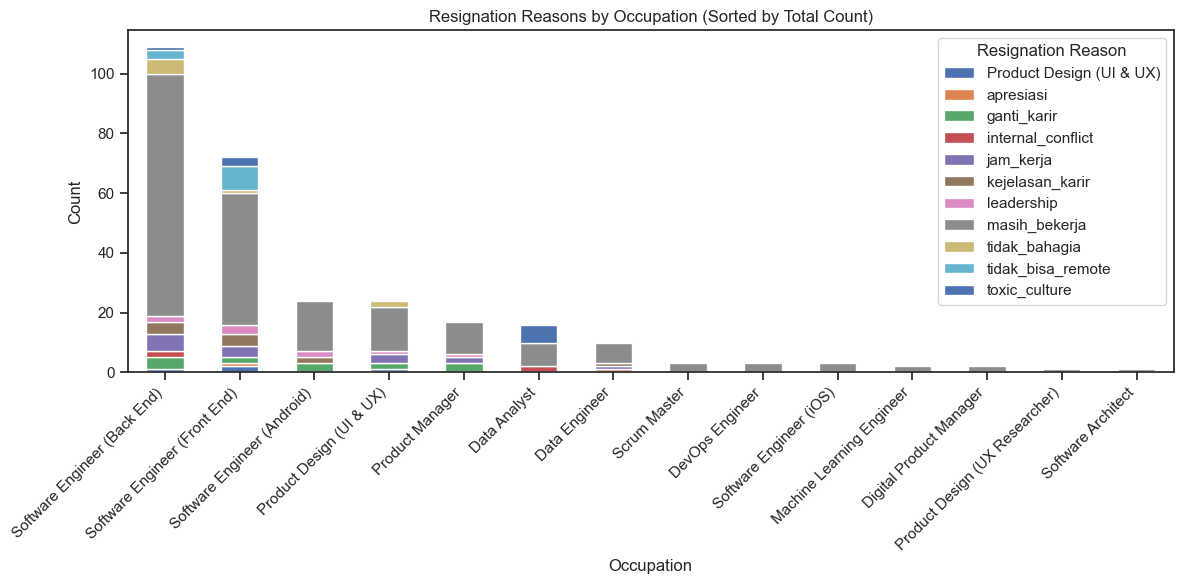

In [108]:
# For Stacked Bar Chart
# First sort the data
df_plot = df_encode.copy()
df_plot['Pekerjaan'] = pd.Categorical(df_plot['Pekerjaan'], 
    categories=df_plot['Pekerjaan'].value_counts().index, 
    ordered=True)

# Create cross-tabulation with sorted index
resignation_by_job = pd.crosstab(df_plot['Pekerjaan'], df_plot['AlasanResign'])

# Create stacked bar chart with sorted data
resignation_by_job.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Resignation Reasons by Occupation (Sorted by Total Count)')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Resignation Reason', bbox_to_anchor=(1, 1))
plt.tight_layout()


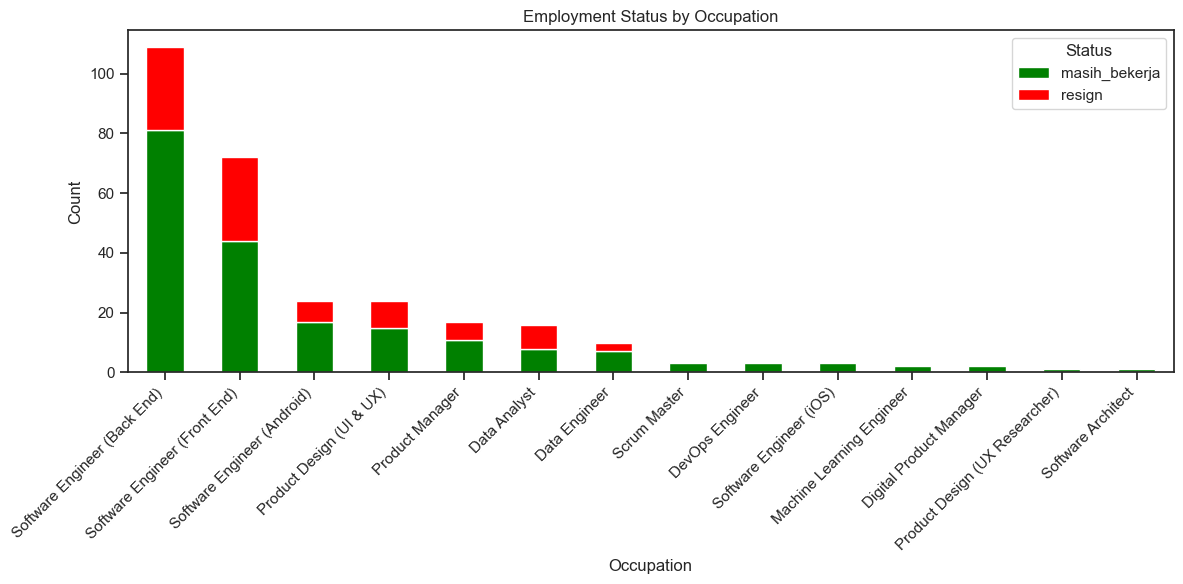

In [268]:
# Create a new column or modify existing one
df_plot['AlasanResign_Simple'] = df_plot['AlasanResign'].apply(
    lambda x: 'masih_bekerja' if x == 'masih_bekerja' else 'resign'
)

# Create the plot with sorted values and simplified categories
# First sort the data by total count
df_plot['Pekerjaan'] = pd.Categorical(df_plot['Pekerjaan'], 
    categories=df_plot['Pekerjaan'].value_counts().index, 
    ordered=True)

# Create cross-tabulation
resignation_by_job = pd.crosstab(df_plot['Pekerjaan'], df_plot['AlasanResign_Simple'])

# Create stacked bar chart
resignation_by_job.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'red'])
plt.title('Employment Status by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status', bbox_to_anchor=(1, 1))
plt.tight_layout()


Looking at the graphic, we want aggregate the data who has no resign history as "Lainnya" so in feature 'Pekerjaan', we have only 8 unique values.

In [110]:
def feat_encode(data):
    data = data.copy()
    # Label encoding
    data['Pekerjaan'] = data['Pekerjaan'].replace({'Scrum Master': 'Lainnya',
                                                   'DevOps Engineer': 'Lainnya',
                                                   'Software Engineer (iOS)': 'Lainnya',
                                                   'Machine Learning Engineer': 'Lainnya',
                                                   'Digital Product Manager': 'Lainnya',
                                                   'Product Deisgn (UX Researcher)': 'Lainnya',
                                                   'Software Architect': 'Lainnya'})
    # One-hot encoding
    data = pd.get_dummies(data, columns=['Pekerjaan'], prefix='Pekerjaan')
    return data

df_encode = feat_encode(df_encode)
df_encode.columns

Index(['JenisKelamin', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah',
       'HiringPlatform', 'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'TingkatPendidikan', 'PernahBekerja',
       'AlasanResign', 'TanggalLahir', 'TanggalHiring',
       'TanggalPenilaianKaryawan', 'TanggalResign',
       'StatusPernikahan_Belum_menikah', 'StatusPernikahan_Bercerai',
       'StatusPernikahan_Lainnya', 'StatusPernikahan_Menikah',
       'StatusKepegawaian_FullTime', 'StatusKepegawaian_Internship',
       'StatusKepegawaian_Outsource', 'Pekerjaan_Data Analyst',
       'Pekerjaan_Data Engineer', 'Pekerjaan_Lainnya',
       'Pekerjaan_Product Design (UI & UX)',
       'Pekerjaan_Product Design (UX Researcher)', 'Pekerjaan_Product Manager',
       'Pekerjaan_Software Engineer (Android)',
       'Pekerjaan_Software Engineer (Back End)',
       'Pekerjaan_Software Engineer (Front End)'],
      dt

## JenjangKarir

In [111]:
df_encode['JenjangKarir'].value_counts()

JenjangKarir
Freshgraduate_program    169
Mid_level                 70
Senior_level              48
Name: count, dtype: int64

This feature is ordinal values where Senior_level is higher than Mid_level and Fresgraduate_program so we will use label encoding instead.
- Fresh graduate: 0
- Mid level: 1
- Senior level: 2

In [112]:
def feat_encode(data):
    data = data.copy()
    # Label encoding
    data['JenjangKarir'] = data['JenjangKarir'].replace({'Freshgraduate_program': 0,
                                                         'Mid_level': 1,
                                                         'Senior_level': 2 })
    return data

df_encode = feat_encode(df_encode)

## PerformancePegawai

In [113]:
df_encode['PerformancePegawai'].value_counts()

PerformancePegawai
Biasa            85
Bagus            74
Sangat_bagus     73
Kurang           31
Sangat_kurang    24
Name: count, dtype: int64

We can also use label encoding for this feature where:
- Sangat kurang: 0
- Kurang: 1
- Biasa: 2
- Bagus: 3
- Sangat bagus: 4

In [114]:
def feat_encode(data):
    data = data.copy()
    # Label encoding
    data['PerformancePegawai'] = data['PerformancePegawai'].replace({'Sangat_kurang': 0,
                                                                     'Kurang': 1,
                                                                     'Biasa': 2,
                                                                     'Bagus': 3,
                                                                     'Sangat_bagus': 4})
    return data

df_encode = feat_encode(df_encode)

## AsalDaerah

In [115]:
df_encode['AsalDaerah'].value_counts()

AsalDaerah
Jakarta Pusat      72
Jakarta Timur      63
Jakarta Barat      55
Jakarta Utara      52
Jakarta Selatan    45
Name: count, dtype: int64

Since this is not distinct values or ordinal, we will use one hot encoding.

In [116]:
def feat_encode(data):
    data = data.copy()
    # One hot encoding
    data = pd.get_dummies(data, columns=['AsalDaerah'], prefix='AsalDaerah')
    return data

df_encode = feat_encode(df_encode)
df_encode.columns

Index(['JenisKelamin', 'JenjangKarir', 'PerformancePegawai', 'HiringPlatform',
       'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'TingkatPendidikan', 'PernahBekerja',
       'AlasanResign', 'TanggalLahir', 'TanggalHiring',
       'TanggalPenilaianKaryawan', 'TanggalResign',
       'StatusPernikahan_Belum_menikah', 'StatusPernikahan_Bercerai',
       'StatusPernikahan_Lainnya', 'StatusPernikahan_Menikah',
       'StatusKepegawaian_FullTime', 'StatusKepegawaian_Internship',
       'StatusKepegawaian_Outsource', 'Pekerjaan_Data Analyst',
       'Pekerjaan_Data Engineer', 'Pekerjaan_Lainnya',
       'Pekerjaan_Product Design (UI & UX)',
       'Pekerjaan_Product Design (UX Researcher)', 'Pekerjaan_Product Manager',
       'Pekerjaan_Software Engineer (Android)',
       'Pekerjaan_Software Engineer (Back End)',
       'Pekerjaan_Software Engineer (Front End)', 'AsalDaerah_Jakarta Bar

## HiringPlatform

In [117]:
df_encode['HiringPlatform'].value_counts()

HiringPlatform
Indeed                     85
LinkedIn                   69
Google_Search              46
Diversity_Job_Fair         27
Employee_Referral          24
CareerBuilder              22
Website                    11
Other                       2
On-line_Web_application     1
Name: count, dtype: int64

Indeed, LinekdIn, and Google_Search is the top 3 with total more than 40 so we will keep this unique values and aggregate others to "Lainnya".

In [118]:
def feat_encode(data):
    data = data.copy()
    # Label encoding
    data['HiringPlatform'] = data['HiringPlatform'].replace({'Diversity_Job_Fair': 'Lainnya',
                                                             'Employee_Referral': 'Lainnya',
                                                             'CareerBuilder': 'Lainnya',
                                                             'Website': 'Lainnya',
                                                             'Other': 'Lainnya',
                                                             'On-line_Web_application': 'Lainnya'})
    # One hot encoding
    data = pd.get_dummies(data, columns=['HiringPlatform'], prefix='HiringPlatform')
    return data

df_encode = feat_encode(df_encode)
df_encode.columns

Index(['JenisKelamin', 'JenjangKarir', 'PerformancePegawai',
       'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'TingkatPendidikan', 'PernahBekerja',
       'AlasanResign', 'TanggalLahir', 'TanggalHiring',
       'TanggalPenilaianKaryawan', 'TanggalResign',
       'StatusPernikahan_Belum_menikah', 'StatusPernikahan_Bercerai',
       'StatusPernikahan_Lainnya', 'StatusPernikahan_Menikah',
       'StatusKepegawaian_FullTime', 'StatusKepegawaian_Internship',
       'StatusKepegawaian_Outsource', 'Pekerjaan_Data Analyst',
       'Pekerjaan_Data Engineer', 'Pekerjaan_Lainnya',
       'Pekerjaan_Product Design (UI & UX)',
       'Pekerjaan_Product Design (UX Researcher)', 'Pekerjaan_Product Manager',
       'Pekerjaan_Software Engineer (Android)',
       'Pekerjaan_Software Engineer (Back End)',
       'Pekerjaan_Software Engineer (Front End)', 'AsalDaerah_Jakarta Barat',
       'AsalD

## TingkatPendidikan

In [119]:
df_encode['TingkatPendidikan'].value_counts()

TingkatPendidikan
Sarjana     176
Magister     87
Doktor       24
Name: count, dtype: int64

Tingkat pendidikan memiliki ordinal values sehingga akan dilakukan label encoding.

In [120]:
def feat_encode(data):
    data = data.copy()
    # Label encoding
    data['TingkatPendidikan'] = data['TingkatPendidikan'].replace({'Sarjana': 0,
                                                                   'Magister': 1,
                                                                   'Doktor': 2})
    return data

df_encode = feat_encode(df_encode)

## PernahBekerja

In [121]:
df_encode['PernahBekerja'].value_counts()

PernahBekerja
1      286
yes      1
Name: count, dtype: int64

1 usually represent as yes so we will label encoding this feature where "yes" replaced to 1.

But, due to the unique value only one (which is "yes"), this feature doesn't give any information so we will drop it.

In [ ]:
df_encode = df_encode.drop(columns=['PernahBekerja'])

## AlasanResign

In [123]:
df_encode['AlasanResign'].value_counts()

AlasanResign
masih_bekerja               198
jam_kerja                    16
ganti_karir                  14
tidak_bisa_remote            11
kejelasan_karir              11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: count, dtype: int64

We will drop this feature and make a new feature 'is_resign' classified which employee who has resign or not. Also, this feature will be label for machine learning.

# Feature Engineering


In [124]:
df_fe = df_encode.copy()

In [125]:
print(f'Tanggal Penilaian Karyawan terakhir: {df_fe["TanggalPenilaianKaryawan"].max()}')

Tanggal Penilaian Karyawan terakhir: 2020-02-28 00:00:00


We want to make new feature 'age' by asumming the data is take on 31 March 2020.

In [126]:
def feature_engineering(data):
    data = data.copy()
    # Label Target
    data['is_resign'] = data['AlasanResign'].apply(lambda x: 0 if x == 'masih_bekerja' else 1)
    data = data.drop(columns=['AlasanResign'], axis=1)

    # Age
    data['age'] = (pd.Timestamp('2020-03-31') - data['TanggalLahir']).dt.days // 365

    # Length of Employment
    data['employment_length'] = (pd.Timestamp('2020-03-31') - data['TanggalHiring']).dt.days // 365
    
    # Extract features from TanggalLahir
    data['TanggalLahir_Year'] = data['TanggalLahir'].dt.year
    data['TanggalLahir_Month'] = data['TanggalLahir'].dt.month

    # Extract features from TanggalHiring
    data['TanggalHiring_Year'] = data['TanggalHiring'].dt.year
    data['TanggalHiring_Month'] = data['TanggalHiring'].dt.month

    # Extract features from TanggalPenilaianKaryawan
    data['TanggalPenilaian_Year'] = data['TanggalPenilaianKaryawan'].dt.year
    data['TanggalPenilaian_Month'] = data['TanggalPenilaianKaryawan'].dt.month

    # Extract features from TanggalResign
    data['TanggalResign_Year'] = data['TanggalResign'].dt.year
    data['TanggalResign_Month'] = data['TanggalResign'].dt.month

    # Drop original datetime columns
    datetime_cols = ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']
    data = data.drop(columns=datetime_cols)
    return data


df_fe = feature_engineering(df_fe)

In [127]:
df_fe['is_resign'].unique()

array([0, 1])

There is no missing values in this feature

In [128]:
df_fe['age'].describe()

count    287.000000
mean      40.627178
std        8.891559
min       27.000000
25%       33.000000
50%       39.000000
75%       46.000000
max       69.000000
Name: age, dtype: float64

In [129]:
df_fe['age'].isna().sum()

np.int64(0)

The age seems not have anomaly becaue the minimum value is 27 years old and the maximum value is 69 years old.

In [130]:
df_fe['employment_length'].describe()

count    287.000000
mean       6.679443
std        1.952682
min        1.000000
25%        5.000000
50%        7.000000
75%        8.000000
max       14.000000
Name: employment_length, dtype: float64

No anomaly we found in this feature. The minimum value is people working for 1 year and the maximum value is working for 14 years.

# Export to CSV

In [131]:
df_final = df_fe.copy()

In [132]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   JenisKelamin                              287 non-null    int64  
 1   JenjangKarir                              287 non-null    int64  
 2   PerformancePegawai                        287 non-null    int64  
 3   SkorSurveyEngagement                      287 non-null    int64  
 4   SkorKepuasanPegawai                       287 non-null    float64
 5   JumlahKeikutsertaanProjek                 287 non-null    float64
 6   JumlahKeterlambatanSebulanTerakhir        287 non-null    float64
 7   JumlahKetidakhadiran                      287 non-null    float64
 8   TingkatPendidikan                         287 non-null    int64  
 9   StatusPernikahan_Belum_menikah            287 non-null    bool   
 10  StatusPernikahan_Bercerai             

In [133]:
boolean_columns = df_final.select_dtypes('bool').columns
for col in boolean_columns:
    df_final[col] = df_final[col].astype('int64')

In [134]:
df_final.to_csv('data_model.csv.gz', index=False, compression='gzip')